/var/folders/37/2qf1sbr12pq7k_mt8_bxrydr0000gn/T/ipykernel_7228/533039085.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_values = df_2021.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)


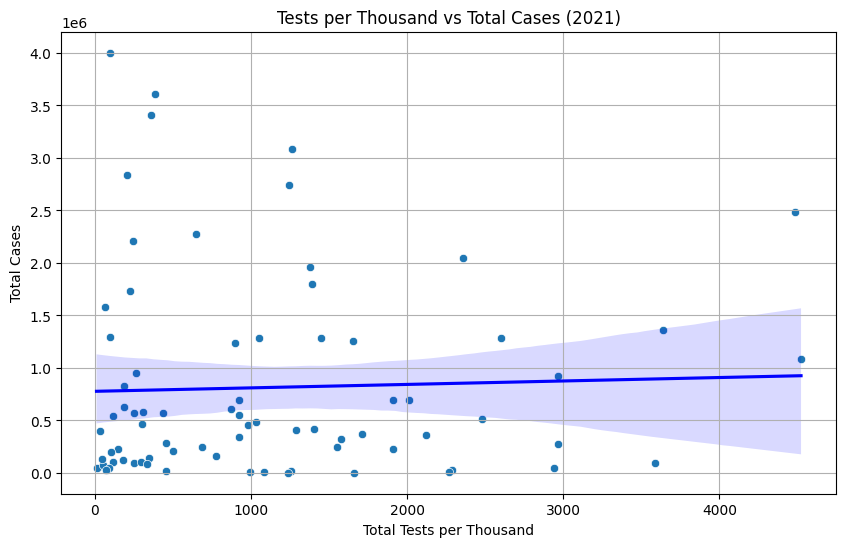

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/Users/nevinezaza/Documents/GitHub/vis/docs/owid-covid-data.csv'
df = pd.read_csv(file_path)

# Filter the data for the year 2021
df['date'] = pd.to_datetime(df['date'])
df_2021 = df[df['date'].dt.year == 2021]

# Get the last available value of total_tests_per_thousand and total_cases for each location in 2021
last_values = df_2021.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)

# Select relevant columns and drop rows with missing values
filtered_data = last_values[['location', 'total_tests_per_thousand', 'total_cases']].dropna()

# Inspect data for zeros
zeros_in_tests = filtered_data[filtered_data['total_tests_per_thousand'] == 0]
zeros_in_cases = filtered_data[filtered_data['total_cases'] == 0]


# Remove zeros before removing outliers
filtered_data = filtered_data[(filtered_data['total_tests_per_thousand'] != 0) & (filtered_data['total_cases'] != 0)]

# Remove outliers using IQR method
Q1_tests = filtered_data['total_tests_per_thousand'].quantile(0.25)
Q3_tests = filtered_data['total_tests_per_thousand'].quantile(0.75)
IQR_tests = Q3_tests - Q1_tests

Q1_cases = filtered_data['total_cases'].quantile(0.25)
Q3_cases = filtered_data['total_cases'].quantile(0.75)
IQR_cases = Q3_cases - Q1_cases

# Define the range for non-outliers
lower_bound_tests = Q1_tests - 1.5 * IQR_tests
upper_bound_tests = Q3_tests + 1.5 * IQR_tests
lower_bound_cases = Q1_cases - 1.5 * IQR_cases
upper_bound_cases = Q3_cases + 1.5 * IQR_cases

# Filter the data to remove outliers
filtered_data_no_outliers = filtered_data[
    (filtered_data['total_tests_per_thousand'] >= lower_bound_tests) &
    (filtered_data['total_tests_per_thousand'] <= upper_bound_tests) &
    (filtered_data['total_cases'] >= lower_bound_cases) &
    (filtered_data['total_cases'] <= upper_bound_cases)
]

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data_no_outliers, x='total_tests_per_thousand', y='total_cases')
sns.regplot(data=filtered_data_no_outliers, x='total_tests_per_thousand', y='total_cases', scatter=False, color='blue')

plt.title('Tests per Thousand vs Total Cases (2021)')
plt.xlabel('Total Tests per Thousand')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


/var/folders/37/2qf1sbr12pq7k_mt8_bxrydr0000gn/T/ipykernel_7228/3756031264.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  last_values_covid = df_covid_2021.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)


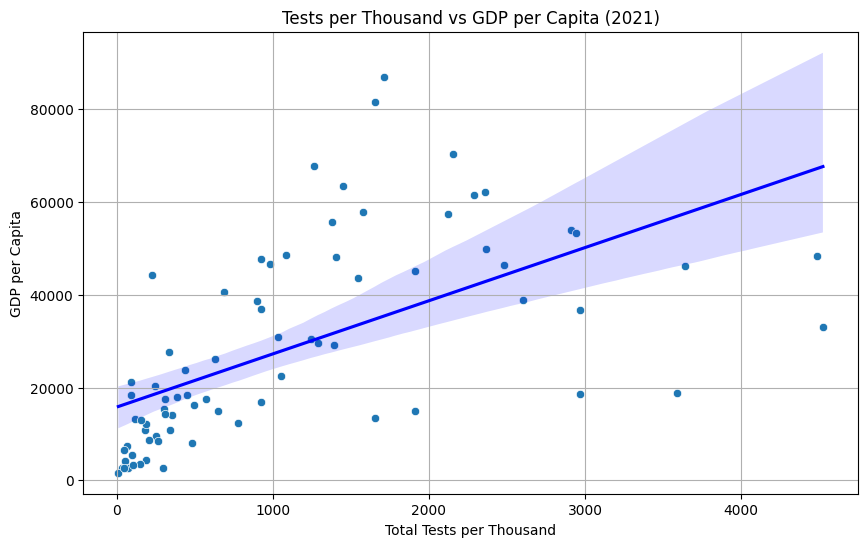

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the COVID-19 data
covid_file_path = '/Users/nevinezaza/Documents/GitHub/vis/docs/owid-covid-data.csv'
df_covid = pd.read_csv(covid_file_path)

# Filter the COVID-19 data for the year 2021
df_covid['date'] = pd.to_datetime(df_covid['date'])
df_covid_2021 = df_covid[df_covid['date'].dt.year == 2021]

# Get the last available value of total_tests_per_thousand for each location in 2021
last_values_covid = df_covid_2021.groupby('location').apply(lambda x: x.loc[x['date'].idxmax()]).reset_index(drop=True)

# Select relevant columns and drop rows with missing values
filtered_data_covid = last_values_covid[['location', 'total_tests_per_thousand']].dropna()

# Load the GDP data
gdp_file_path = '/Users/nevinezaza/Documents/GitHub/vis/docs/GDP-data.csv'
df_gdp = pd.read_csv(gdp_file_path, skiprows=4)

# Extract GDP data for 2021 and select relevant columns
df_gdp_2021 = df_gdp[['Country Name', '2021']].rename(columns={'Country Name': 'location', '2021': 'gdp_per_capita'}).dropna()

# Merge the COVID-19 data with the GDP data
merged_data = pd.merge(filtered_data_covid, df_gdp_2021, on='location')

# Remove rows with zero values
merged_data = merged_data[(merged_data['total_tests_per_thousand'] != 0) & (merged_data['gdp_per_capita'] != 0)]

# Remove outliers using IQR method
Q1_tests = merged_data['total_tests_per_thousand'].quantile(0.25)
Q3_tests = merged_data['total_tests_per_thousand'].quantile(0.75)
IQR_tests = Q3_tests - Q1_tests

Q1_gdp = merged_data['gdp_per_capita'].quantile(0.25)
Q3_gdp = merged_data['gdp_per_capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Define the range for non-outliers
lower_bound_tests = Q1_tests - 1.5 * IQR_tests
upper_bound_tests = Q3_tests + 1.5 * IQR_tests
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

# Filter the data to remove outliers
filtered_data_no_outliers = merged_data[
    (merged_data['total_tests_per_thousand'] >= lower_bound_tests) &
    (merged_data['total_tests_per_thousand'] <= upper_bound_tests) &
    (merged_data['gdp_per_capita'] >= lower_bound_gdp) &
    (merged_data['gdp_per_capita'] <= upper_bound_gdp)
]

# Plotting with linear scale
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data_no_outliers, x='total_tests_per_thousand', y='gdp_per_capita')
sns.regplot(data=filtered_data_no_outliers, x='total_tests_per_thousand', y='gdp_per_capita', scatter=False, color='blue')

plt.title('Tests per Thousand vs GDP per Capita (2021)')
plt.xlabel('Total Tests per Thousand')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()
